<a href="https://colab.research.google.com/github/lmkelly16/BYU-REU-2022/blob/main/ZOI_44_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Imports
import pandas as pd
import numpy as np
import glob
import gdal

# Our image processing tools
import skimage.filters
import skimage.io
import skimage.morphology

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sn

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import it
img_list = glob.glob('/content/drive/MyDrive/BYU_REU_images/*Z44A.tiff')

#sort it
img_list = np.sort(img_list)

#check to make sure it looks right
img_list

array(['/content/drive/MyDrive/BYU_REU_images/1Z44A.tiff',
       '/content/drive/MyDrive/BYU_REU_images/2Z44A.tiff'], dtype='<U48')

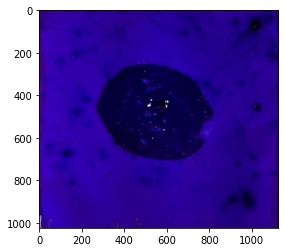

In [3]:
# Load the phase contrast image.
im = skimage.io.imread(img_list[1])

# look at it
plt.imshow(im);

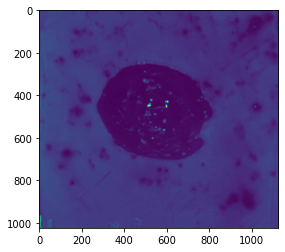

In [4]:
# see how good the contrast is
cim = im[:,:,0]
plt.imshow(cim);

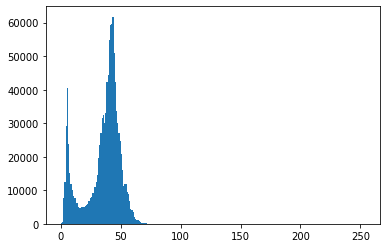

In [5]:
# forcing bins to be discretized by integer value
bins = np.arange(cim.min(), cim.max(), 1)

# plot histogram
plt.hist(cim.flatten(), bins=bins);

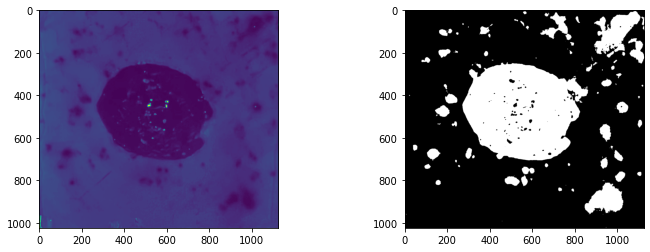

In [7]:
''' Thresholding '''
# Threshold value, as obtained by eye
im_thresh = 29

# Generate thresholded image
im_bw = cim < im_thresh

# plot orginal and thresholded next to each other
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].imshow(cim)
ax[1].imshow(im_bw, cmap=plt.cm.gray);

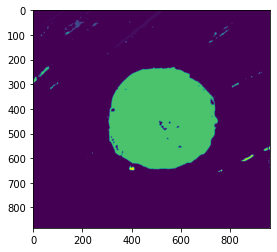

In [ ]:
''' Labeling a segmented image '''

# labels whatever you segmented out (bacteria for example)
labeled = skimage.measure.label(im_bw)
plt.imshow(labeled);


In [ ]:
#make an area list wheeeee!
area_list=[]
for i in range(len(labeled)):
  bacteria = (labeled == i)
  area=bacteria.sum()
  area_list.append(area)
area_list

good=[]
for i in area_list:
  if i > 1000:
    good.append(i)

bact_area_1=good[2]
bact_area_1

143729

In [9]:
area_list=[]
zone_area_list=[]

for i in range(len(img_list)):
  
  # Load the phase contrast image.
  im = skimage.io.imread(img_list[i])
  cim = im[:,:,0]

  # Threshold value, as obtained by eye
  im_thresh = 35

  # Generate thresholded image
  im_bw = cim < im_thresh

  # labels whatever you segmented out (bacteria for example)
  labeled = skimage.measure.label(im_bw)

  #make an area list wheeeee!
  for i in range(len(labeled)):
    bacteria = (labeled == i)
    area=bacteria.sum()
    area_list.append(area)

  for i in area_list:
    if i > 50000 and i < 300000:
      zone_area_list.append(i)

zone_area_list

[145477, 145477, 267448, 59451]